# Assignment 1
## K-Nearest Neighbors (KNN):
1. Load the dataset 'iris.csv' using Pandas and split it into features (X) and target variable (y). Print how many features and target classes are there in the dataset? (Hint: Use Pandas functions)

In [ ]:
!git clone https://github.com/industrial-training-cum-internship/2k23-repos

In [2]:
dataset_path = '/content/2k23-repos/session-resources/assignment/dataset/'
dataset_path

'/content/2k23-repos/session-resources/assignment/dataset/'

In [3]:
import pandas as pd

# Load the dataset using Pandas
dataset = pd.read_csv(dataset_path + 'iris.csv')
# printing the data
dataset.head(10)

,Index,sepallength,sepalwidth,petallength,petalwidth,class
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa
5,5,5.4,3.9,1.7,0.4,Iris-setosa
6,6,4.6,3.4,1.4,0.3,Iris-setosa
7,7,5.0,3.4,1.5,0.2,Iris-setosa
8,8,4.4,2.9,1.4,0.2,Iris-setosa
9,9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
feature_columns = ['sepallength', 'sepalwidth', 'petallength','petalwidth']
# Split the dataset into features (X) and target variable (y)
X = dataset[feature_columns].values
y = dataset['class'].values

# Alternative way of selecting features and labels arrays:
# X = dataset.iloc[:, 1:5].values
# y = dataset.iloc[:, 5].values

Label encoding

NOTE: As we can see labels are categorical. KNeighborsClassifier does not accept string labels. We need to use LabelEncoder to transform them into numbers. Iris-setosa correspond to 0, Iris-versicolor correspond to 1 and Iris-virginica correspond to 2.

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [6]:
# Check the number of features and target classes
num_features = X.shape[1]
num_target_classes = set(y)

print("Number of features:", num_features)
print("Number of target classes:", num_target_classes)

Number of features: 4
Number of target classes: {0, 1, 2}


2. Explain the concept of the KNN algorithm in your own words.

  In K-Nearest Neighbors (KNN), the algorithm is based on the idea that data points in the same class tend to be close to each other in the feature space. KNN is a simple yet powerful classification algorithm that operates on the principle of similarity.

  Here's a simplified explanation of how the KNN algorithm works:

  1. **Training Phase**: During the training phase, the algorithm stores the entire training dataset in memory. This dataset consists of labeled examples, where each example is a data point with its corresponding class label.

  2. **Prediction Phase**: When a new, unlabeled data point is given for prediction, the KNN algorithm looks for the 'K' nearest neighbors to the new point in the feature space. The 'K' neighbors are determined based on the distance metric, such as Euclidean distance.

  3. **Majority Voting**: Once the 'K' nearest neighbors are identified, the algorithm examines their class labels. In the classification task, the class labels of the 'K' neighbors are used to determine the class of the new data point. The class label that occurs most frequently among the 'K' neighbors is assigned to the new data point.

3. What is the significance of the parameter 'K' in KNN? How does it affect the algorithm's performance? (Hint: Consider the usage of NumPy arrays and scikit-learn's KNeighborsClassifier)

  The parameter 'K' in K-Nearest Neighbors (KNN) represents the number of neighbors to consider when making predictions for a new data point. It is a hyperparameter that needs to be specified before training the KNN algorithm.

  The choice of 'K' has a significant impact on the performance of the KNN algorithm. Here's how it affects the algorithm's performance:

  1. **Underfitting and Overfitting**: If 'K' is too small (e.g., 1), the algorithm becomes sensitive to noisy or irrelevant data points, leading to overfitting. The decision boundary may become too complex and fail to generalize well to unseen data. On the other hand, if 'K' is too large (e.g., equal to the total number of data points), the model may become overly generalized, leading to underfitting and a high bias.

  2. **Bias-Variance Tradeoff**: A smaller 'K' leads to a more flexible decision boundary that can capture complex patterns in the training data. This reduces bias but increases variance, making the model more prone to overfitting. Conversely, a larger 'K' reduces variance but may introduce more bias by oversimplifying the decision boundary.

  3. **Smoothing Effect**: A larger 'K' leads to a smoother decision boundary as it considers a larger number of neighbors. This can help to reduce the impact of noisy or outlier data points on the predictions. However, it may also cause the model to overlook local patterns or fine-grained details in the data.

  4. **Computational Complexity**: The computational cost of the KNN algorithm increases with a larger 'K' since it requires computing distances to more neighbors. Therefore, choosing a very large 'K' can make the algorithm slower, especially for datasets with a large number of training samples.

  To determine the optimal value of 'K', it is common to perform hyperparameter tuning using techniques such as cross-validation or grid search. These techniques evaluate the performance of the KNN algorithm with different values of 'K' and select the value that provides the best balance between bias and variance for the specific dataset.

4. Split the dataset into training and testing sets using an 80:20 ratio. (Hint: Use scikit-learn's train_test_split)

In [7]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (120, 4)
Shape of X_test: (30, 4)
Shape of y_train: (120,)
Shape of y_test: (30,)


### Data Visualisation

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Parallel Coordinates

Parallel coordinates is a plotting technique for plotting multivariate data. It allows one to see clusters in data and to estimate other statistics visually. Using parallel coordinates points are represented as connected line segments. Each vertical line represents one attribute. One set of connected line segments represents one data point. Points that tend to cluster will appear closer together.

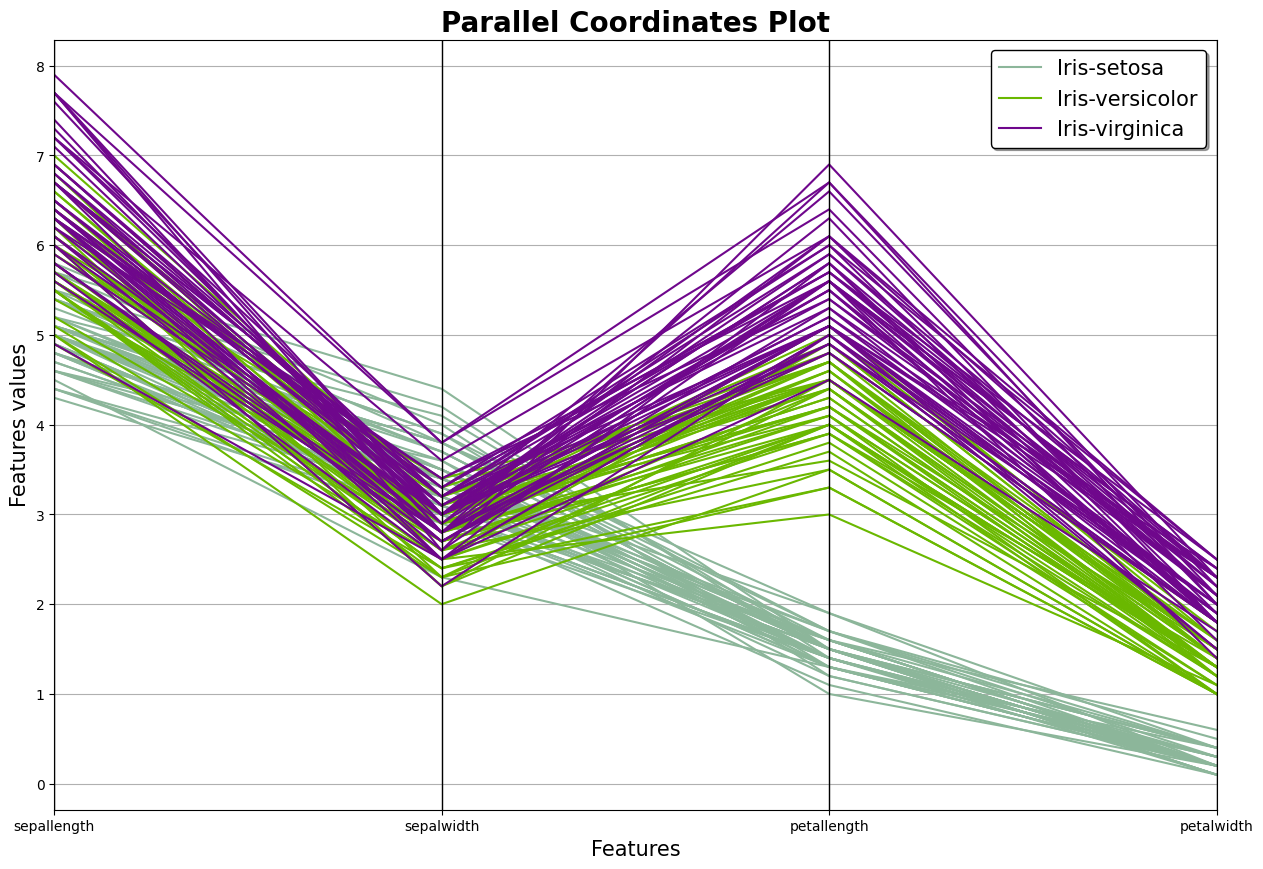

In [9]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(dataset.drop("Index", axis=1), "class")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

Andrews Curves

Andrews curves allow one to plot multivariate data as a large number of curves that are created using the attributes of samples as coefficients for Fourier series. By coloring these curves differently for each class it is possible to visualize data clustering. Curves belonging to samples of the same class will usually be closer together and form larger structures.

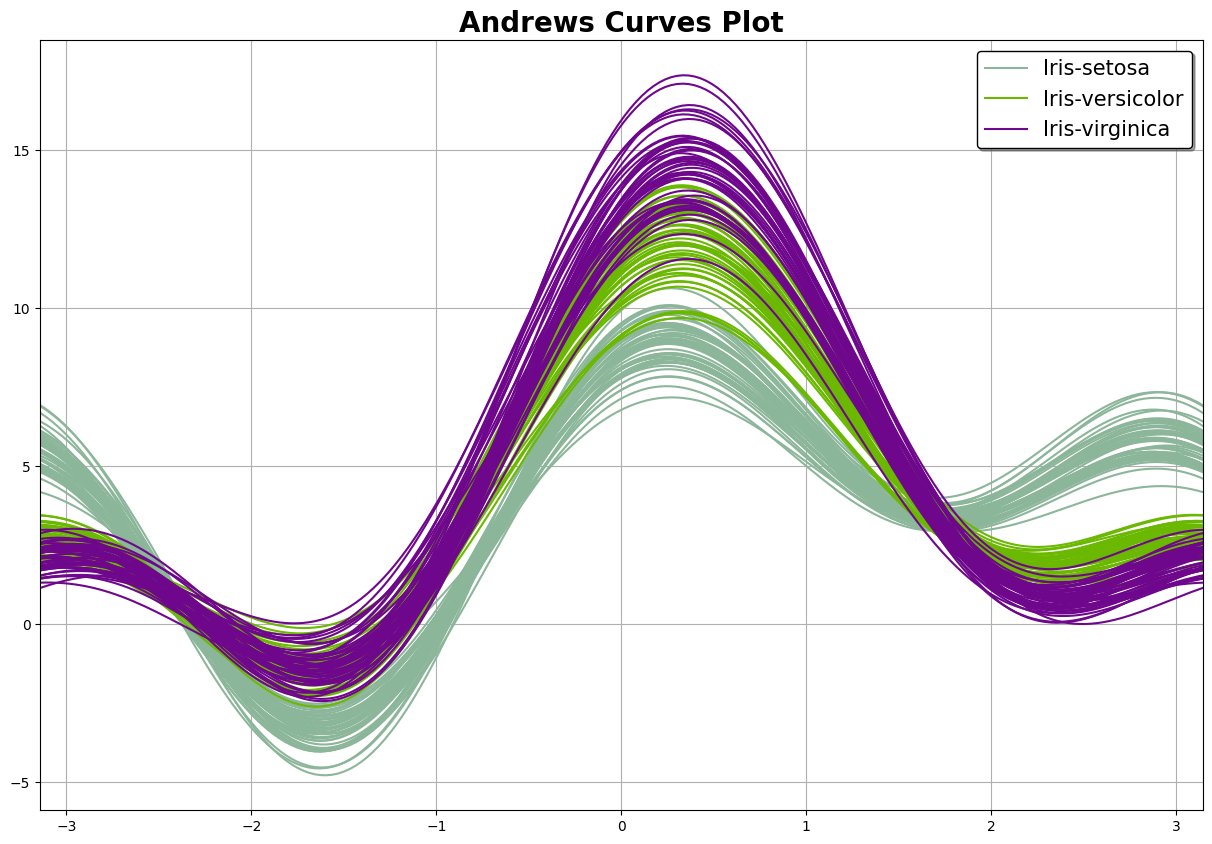

In [10]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(dataset.drop("Index", axis=1), "class")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

Pairplot

Pairwise is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset.

<Figure size 640x480 with 0 Axes>

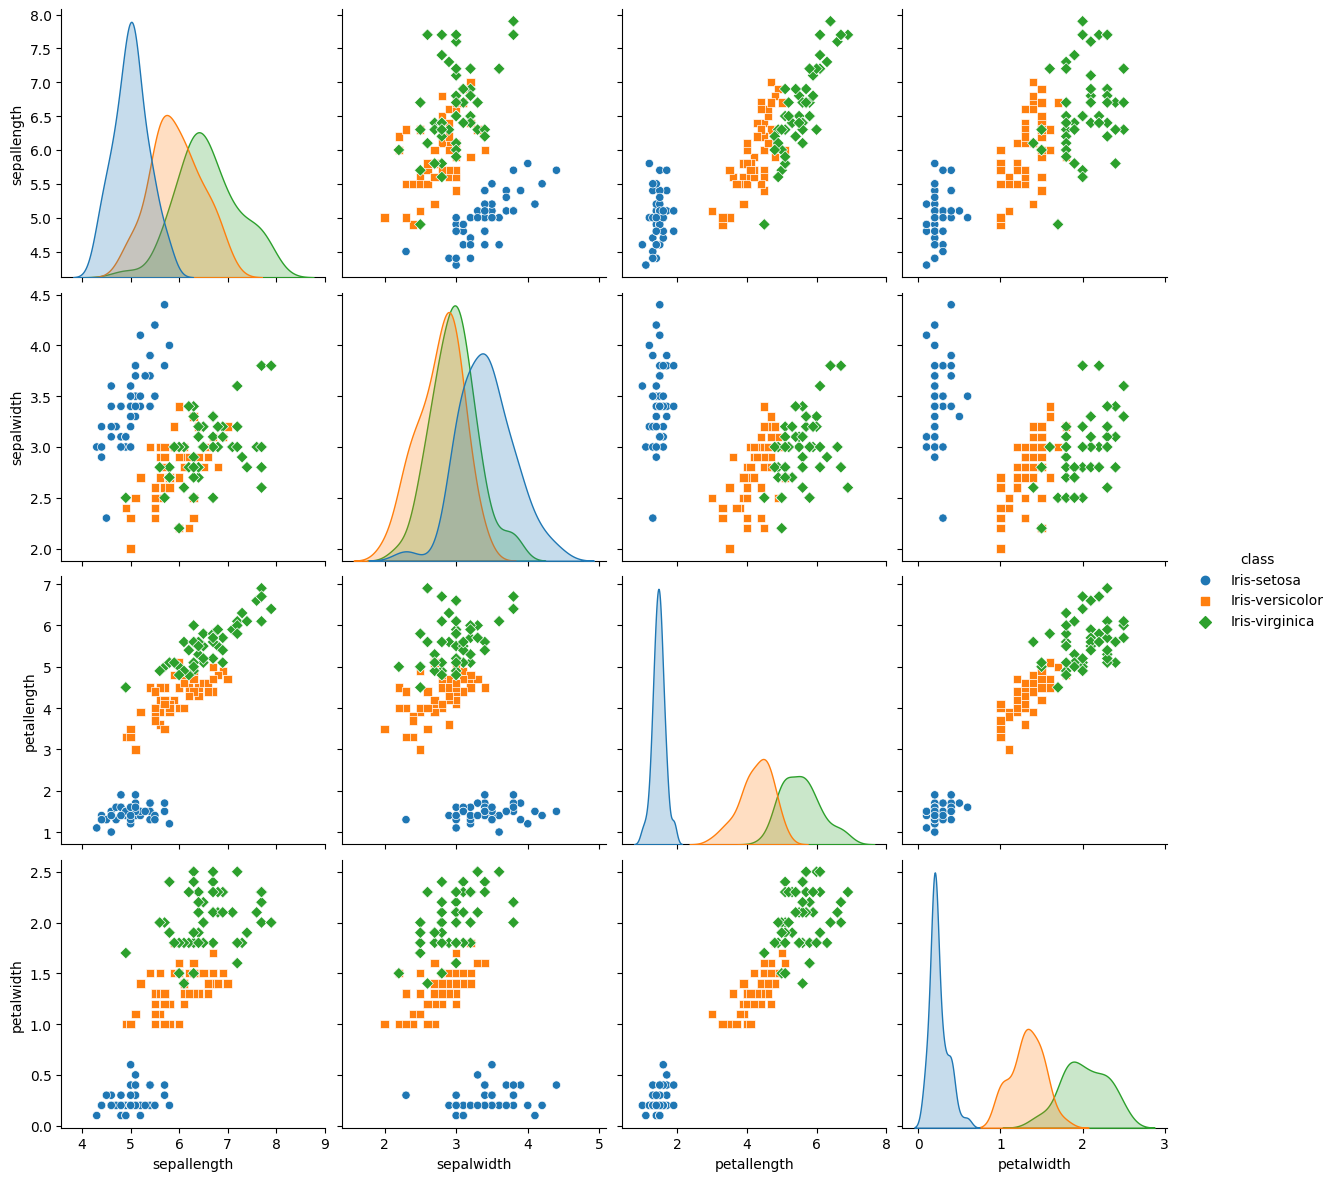

In [11]:
plt.figure()
sns.pairplot(dataset.drop("Index", axis=1), hue = "class", height=3, markers=["o", "s", "D"])
plt.show()

Boxplots

<Figure size 640x480 with 0 Axes>

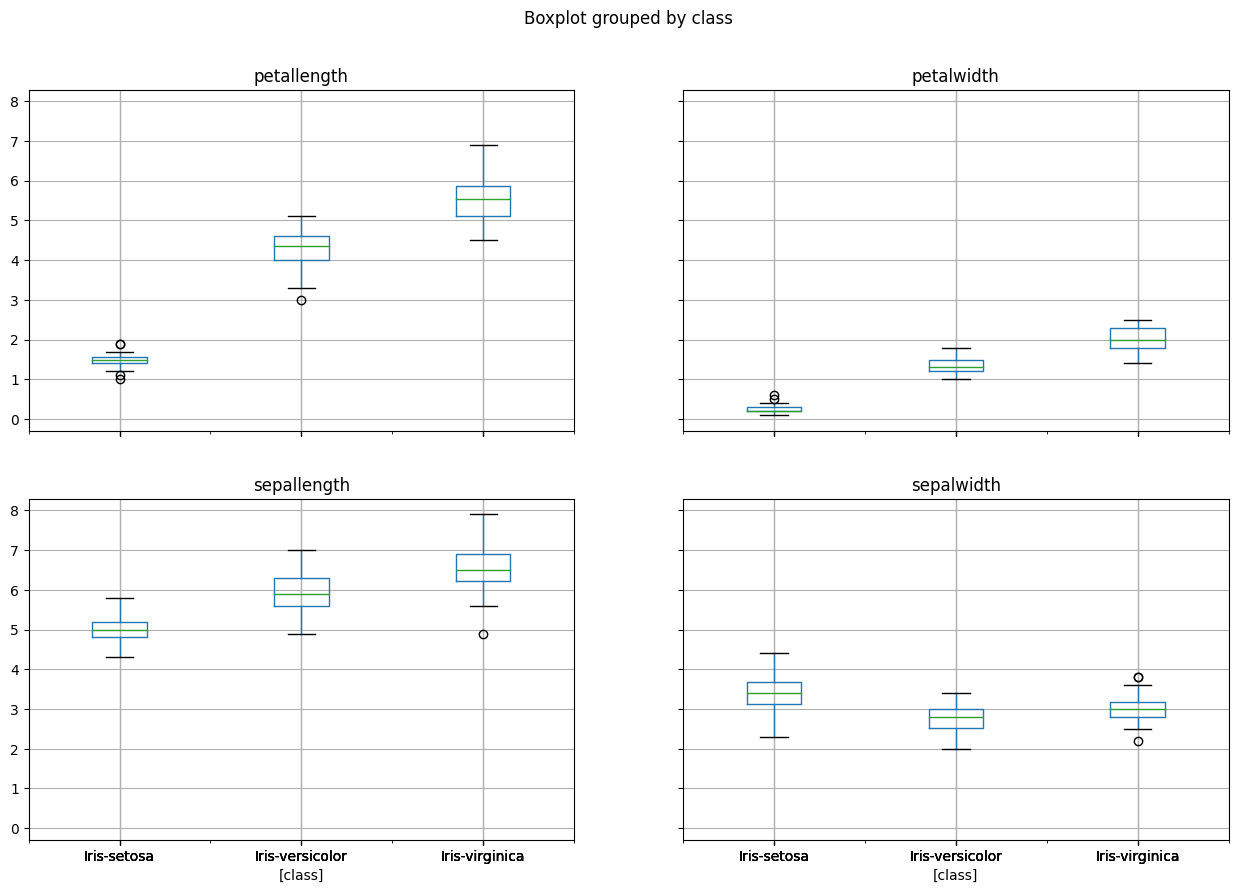

In [12]:
plt.figure()
dataset.drop("Index", axis=1).boxplot(by="class", figsize=(15, 10))
plt.show()

5. Perform feature scaling on the training data using the StandardScaler from scikit-learn. (Hint: Utilize scikit-learn's StandardScaler)

In [13]:
from sklearn.preprocessing import StandardScaler

# Perform feature scaling on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Print the scaled training data
print("Scaled training data:")
print(X_train_scaled)

Scaled training data:
[[-1.47393679  1.22037928 -1.5639872  -1.30948358]
 [-0.13307079  3.02001693 -1.27728011 -1.04292204]
 [ 1.08589829  0.09560575  0.38562104  0.28988568]
 [-1.23014297  0.77046987 -1.21993869 -1.30948358]
 [-1.7177306   0.32056046 -1.39196294 -1.30948358]
 [ 0.59831066 -1.25412249  0.72966956  0.95628954]
 [ 0.72020757  0.32056046  0.44296246  0.42316645]
 [-0.74255534  0.99542457 -1.27728011 -1.30948358]
 [-0.98634915  1.22037928 -1.33462153 -1.30948358]
 [-0.74255534  2.34515281 -1.27728011 -1.44276436]
 [-0.01117388 -0.80421307  0.78701097  0.95628954]
 [ 0.23261993  0.77046987  0.44296246  0.55644722]
 [ 1.08589829  0.09560575  0.5576453   0.42316645]
 [-0.86445224  0.99542457 -1.33462153 -1.17620281]
 [-0.49876152  1.44533399 -1.27728011 -1.30948358]
 [-0.37686461 -1.47907719 -0.01576889 -0.24323741]
 [ 0.59831066 -0.57925837  0.78701097  0.42316645]
 [ 0.72020757  0.09560575  1.01637665  0.82300877]
 [ 0.96400139 -0.12934896  0.38562104  0.28988568]
 [ 1.6953

6. Train a KNN classifier on the scaled training data with a chosen value of K. What is the accuracy of the model on the testing data? (Hint: Use scikit-learn's KNeighborsClassifier and accuracy_score)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_test_scaled = scaler.transform(X_test)

# Train a KNN classifier
k = 5  # chosen value of K
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Predict the labels for the testing data
y_pred = knn.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [16]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 100.0 %.


 Using cross-validation for parameter tuning:

<Figure size 640x480 with 0 Axes>

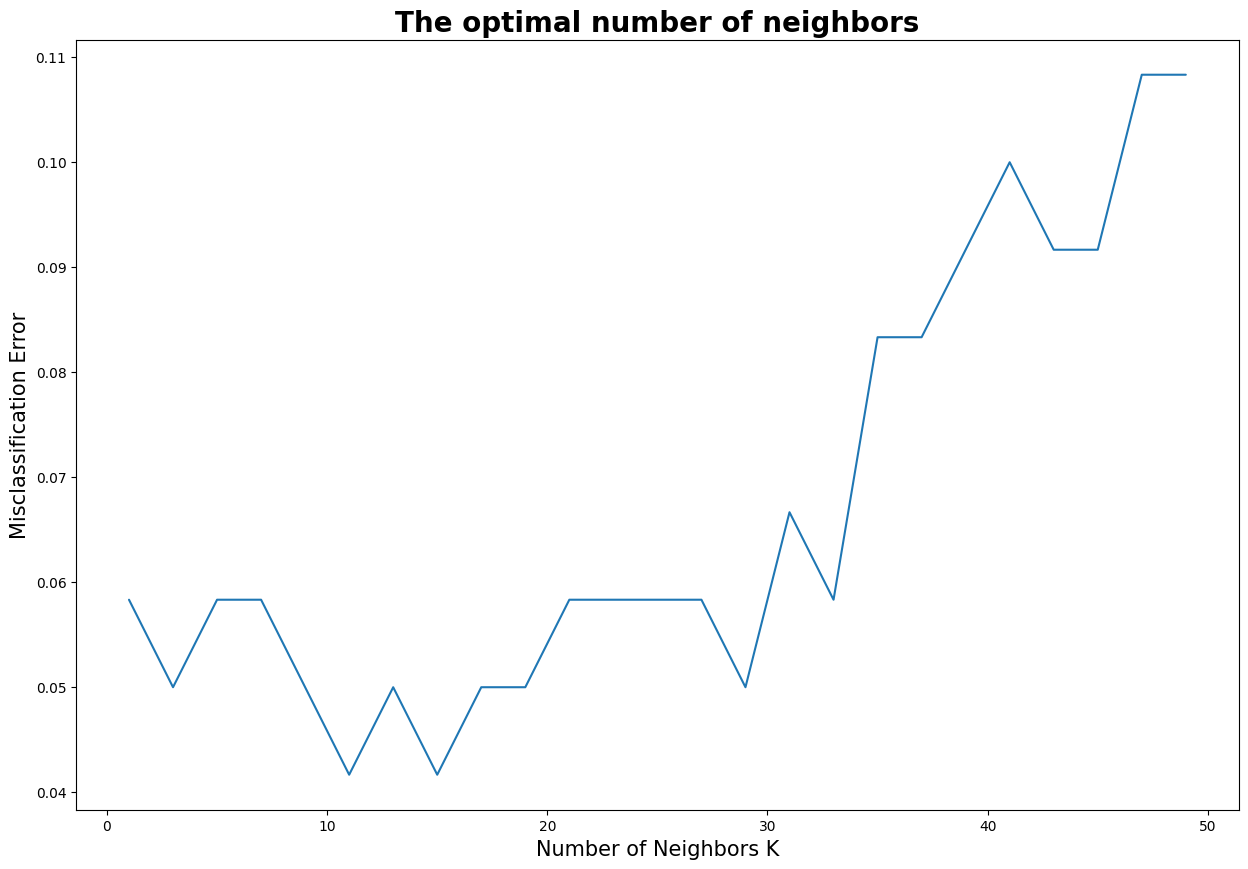

In [17]:
from sklearn.model_selection import cross_val_score

# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [18]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 11.


## Decison Tree

**1. Load the dataset 'titanic.csv' using Pandas and split it into features (X) and target variable (y). Print how many features and target classes are there in the dataset? (Hint: Use Pandas functions)**

In [19]:
import pandas as pd

dataset=pd.read_csv(dataset_path + "titanic.csv")
dataset.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Preprocess the data

In [20]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())
dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**2. What is the concept of entropy and Information gain in the context of decision trees? How is it calculated? (Hint: Consider the usage of scikit-learn's DecisionTreeClassifier)**

In the context of decision trees, entropy and information gain are concepts used to determine the best attribute to split on at each node of the tree. They help in selecting the attribute that provides the most useful information for making decisions.

**Entropy**: Entropy is a measure of impurity or disorder in a set of examples. In the context of decision trees, it quantifies the randomness or uncertainty associated with the target variable. An attribute with low entropy means it has less disorder and provides more information for decision making.

**Entropy is calculated using the formula:**

Entropy(S) = -p_pos * log2(p_pos) - p_neg * log2(p_neg)

where S represents the set of examples, p_pos is the proportion of positive examples in S, and p_neg is the proportion of negative examples in S.

**Information Gain**: Information gain measures the reduction in entropy achieved by splitting the dataset on a particular attribute. It quantifies the amount of information gained about the target variable after the split. The attribute with the highest information gain is selected as the splitting attribute.

**Information gain is calculated using the formula:**

InformationGain(S, A) = Entropy(S) - Sum[(|S_v| / |S|) * Entropy(S_v)]

where 'S' is the set of examples, 'A' is the attribute being considered for splitting, '|S_v|' is the number of examples in subset 'S_v' after splitting on attribute 'A', and '|S|' is the total number of examples in 'S'.



**3. Split the dataset into training and testing sets using a 70:30 ratio. (Hint: Use scikit-learn's train_test_split)**

In [21]:
# Split the dataset into features (X) and target variable (y)
drop_elements = [ 'Name', 'Ticket', 'Cabin', 'SibSp', 'Survived', 'Sex', 'Embarked']
X = dataset.drop(drop_elements, axis=1)
y = dataset['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
X_train

Training set shape: (623, 5) (623,)
Testing set shape: (268, 5) (268,)


,PassengerId,Pclass,Age,Parch,Fare
445,446,1,4.0,2,81.8583
650,651,3,28.0,0,7.8958
172,173,3,1.0,1,11.1333
450,451,2,36.0,2,27.7500
314,315,2,43.0,1,26.2500
...,...,...,...,...,...
106,107,3,21.0,0,7.6500
270,271,1,28.0,0,31.0000
860,861,3,41.0,0,14.1083
435,436,1,14.0,2,120.0000


**4. Train a decision tree classifier on the training data. What is the maximum depth of the tree? (Hint: Utilize scikit-learn's DecisionTreeClassifier)**

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Train a decision tree classifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Determine the maximum depth of the tree
max_depth = tree.tree_.max_depth
print("Maximum depth of the decision tree:", max_depth)

Maximum depth of the decision tree: 18


**5. Make predictions on the testing data using the trained decision tree model. (Hint: Use the predict() method of the DecisionTreeClassifier)**

In [23]:
# Make predictions on the testing data
y_pred = tree.predict(X_test)

# Print the predicted labels
print("Predicted labels:", y_pred)

Predicted labels: [1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1
 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1
 0 1 1 1 0 0 0 0 0]


**6. Calculate the accuracy, precision, and recall of the decision tree model. (Hint: Utilize scikit-learn's accuracy_score, precision_score, and recall_score)**

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6492537313432836
Precision: 0.6024096385542169
Recall: 0.45045045045045046


**7. How can you handle missing values in a dataset when using decision trees? (Hint: Consider scikit-learn's Imputer or Pandas' fillna methods)**

When working with decision trees, there are a few approaches to handle missing values in a dataset:

1. **Imputation using Scikit-learn's Imputer**: Scikit-learn provides the `Imputer` class, which can be used to fill missing values with a specified strategy. You can create an instance of `Imputer` and fit it on your dataset to compute the imputation values for missing values. Then, transform your dataset to replace the missing values with the computed imputation values. Here's an example:

```python
from sklearn.impute import SimpleImputer

# Create an instance of Imputer with the desired strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the dataset to compute imputation values
imputer.fit(X)

# Transform the dataset to replace missing values
X_imputed = imputer.transform(X)
```

2. **Imputation using Pandas' fillna**: If you're working with a Pandas DataFrame, you can use the `fillna` method to replace missing values with a specified value or strategy. You can fill missing values with the mean, median, mode, or any other desired value. Here's an example:

```python
import pandas as pd

# Fill missing values in the DataFrame with the mean
X_filled = X.fillna(X.mean())

# Fill missing values in a specific column with a custom value
X['column_name'] = X['column_name'].fillna(custom_value)
```

3. **Categorical Imputation**: If you have categorical features with missing values, you can assign a new category or use the most frequent category to fill the missing values.

```python
import pandas as pd

# Fill missing values in a categorical column with the most frequent category
X['categorical_column'] = X['categorical_column'].fillna(X['categorical_column'].mode().iloc[0])

# Assign a new category for missing values
X['categorical_column'] = X['categorical_column'].fillna('Unknown')
```

It's important to note that the choice of imputation strategy depends on the specific dataset and the nature of missing values. Also, handling missing values is just one aspect of data preprocessing, and it's essential to consider the potential impact of imputation on the performance and interpretability of the decision tree model.

Remember to adapt the code snippets to your specific dataset and column names.

**8. Visualize the trained decision tree using the plot_tree() function from scikit-learn and Matplotlib. (Hint: Utilize scikit-learn's plot_tree and Matplotlib for visualization)**

In [25]:
print(X.columns)

Index(['PassengerId', 'Pclass', 'Age', 'Parch', 'Fare'], dtype='object')


In [26]:
!pip install sklearn

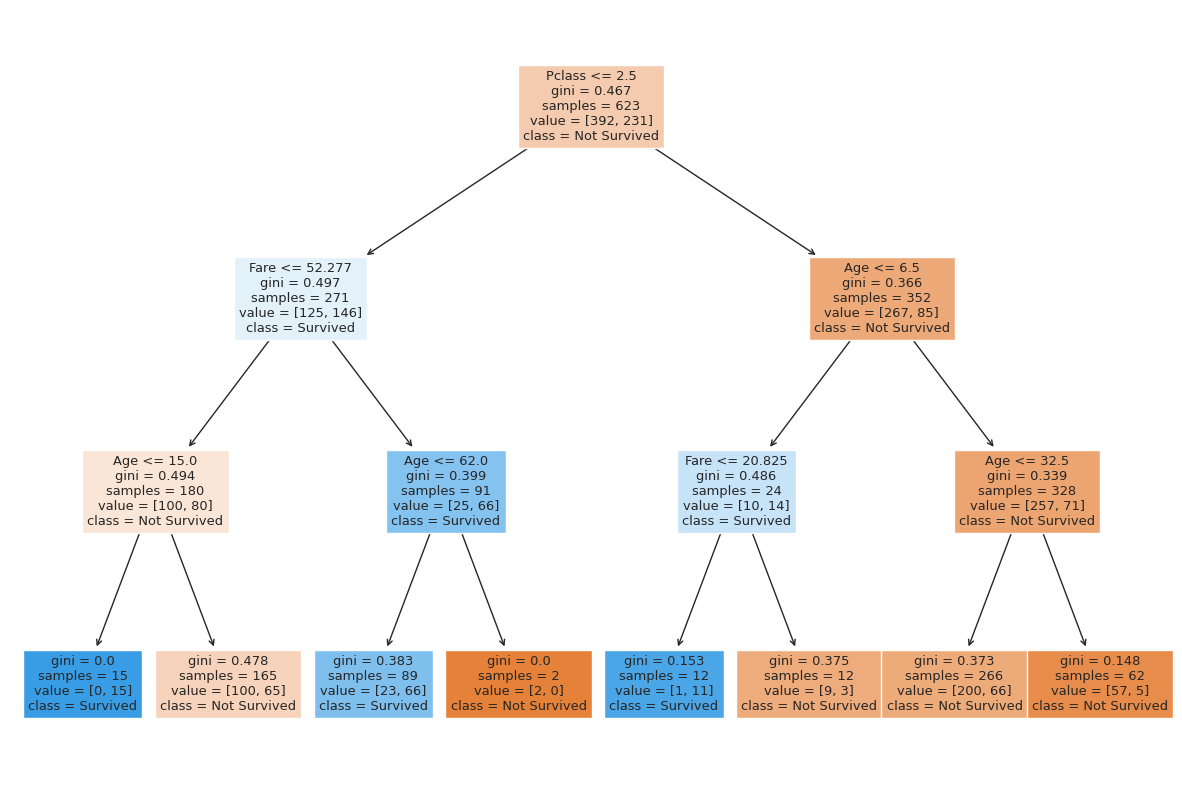

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train a decision tree classifier
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(15,10))
plot_tree(classifier, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

## SVM

**1. Load the dataset 'breast_cancer.csv' using pandas and split it into features (X) and target variable (y). How many features and target classes are there in the dataset? ( Hint: Check the shape of the DataFrame using df.shape.)**

In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

df_cancer = pd.read_csv(dataset_path + 'breast_cancer.csv')
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [29]:
df_cancer.shape

(569, 33)

In [30]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [31]:
df_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [32]:
df_cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

Plot Heatmap

<ipython-input-33-10349f504777>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cancer.corr(),annot=True)


<Axes: >

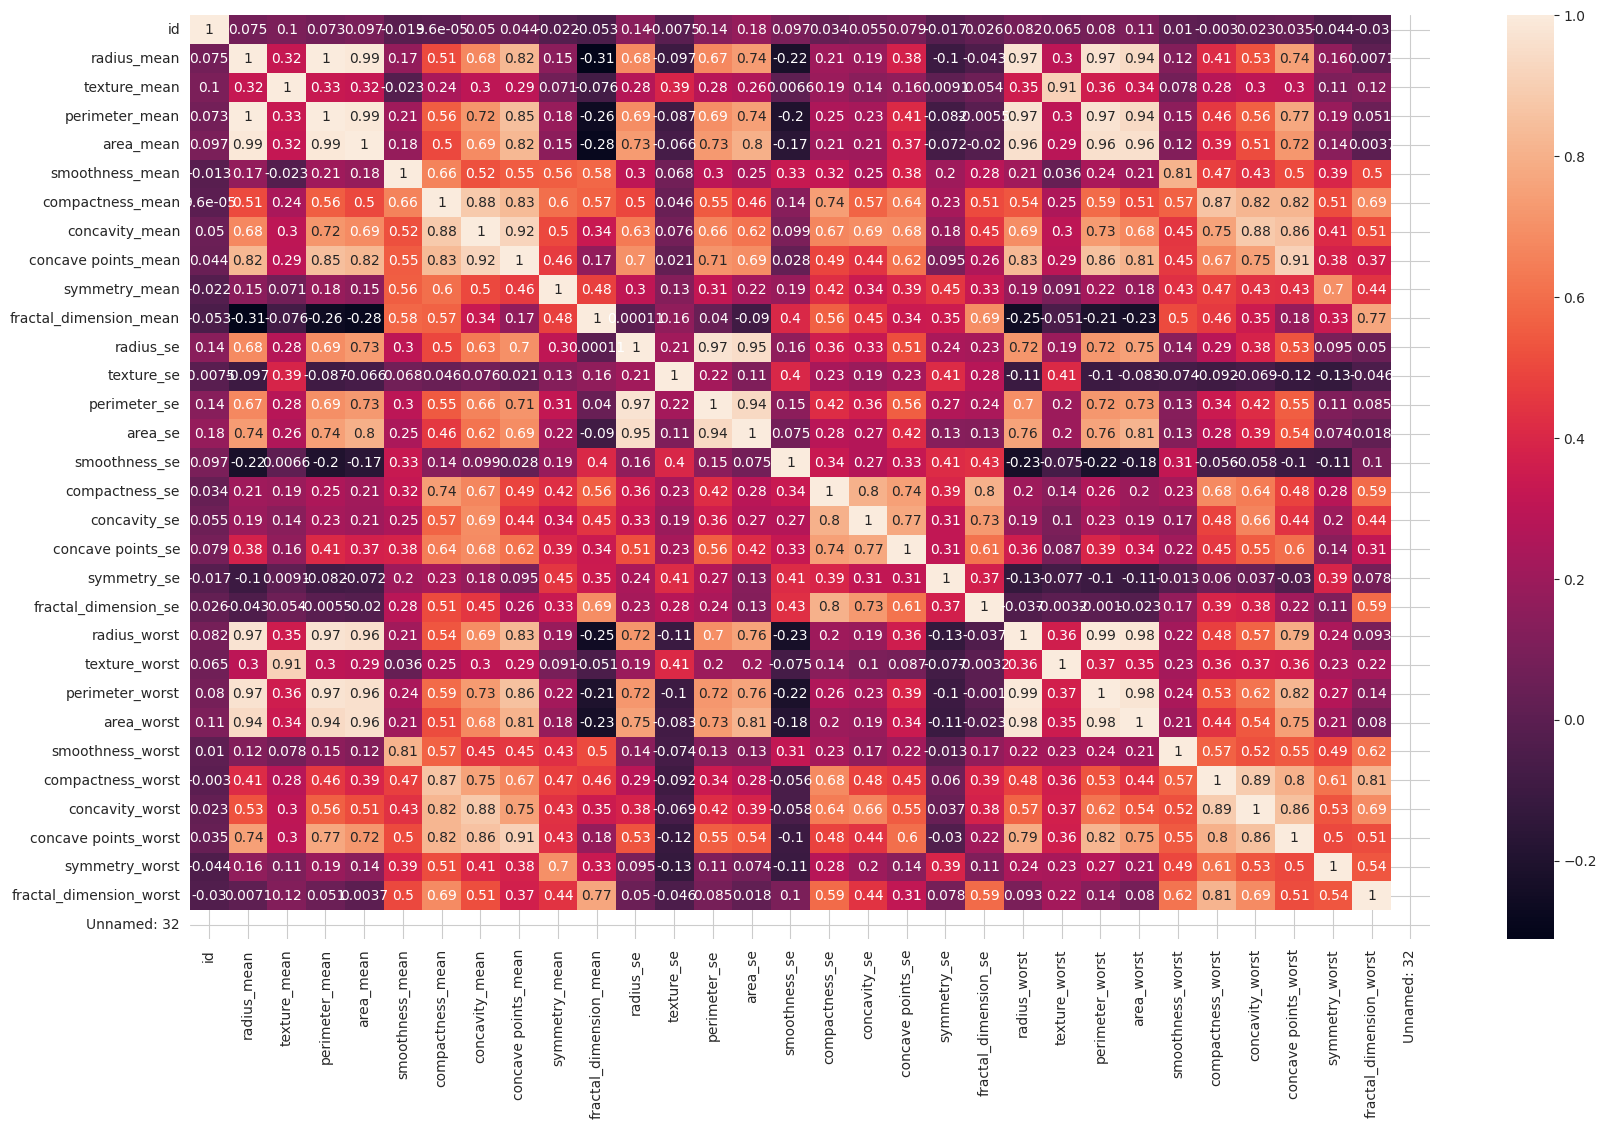

In [33]:
plt.figure(figsize=(20,12))
sns.heatmap(df_cancer.corr(),annot=True)

In [34]:
df=df_cancer
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [35]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df['diagnosis'] = lb.fit_transform(df['diagnosis'])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [37]:
X=df.iloc[:,1:32].values
#X
y=df.iloc[:,0].values
#y
num_features = X.shape[1]
num_target_classes = len(np.unique(y))

print("Number of features:", num_features)
print("Number of target classes:", num_target_classes)

Number of features: 30
Number of target classes: 2


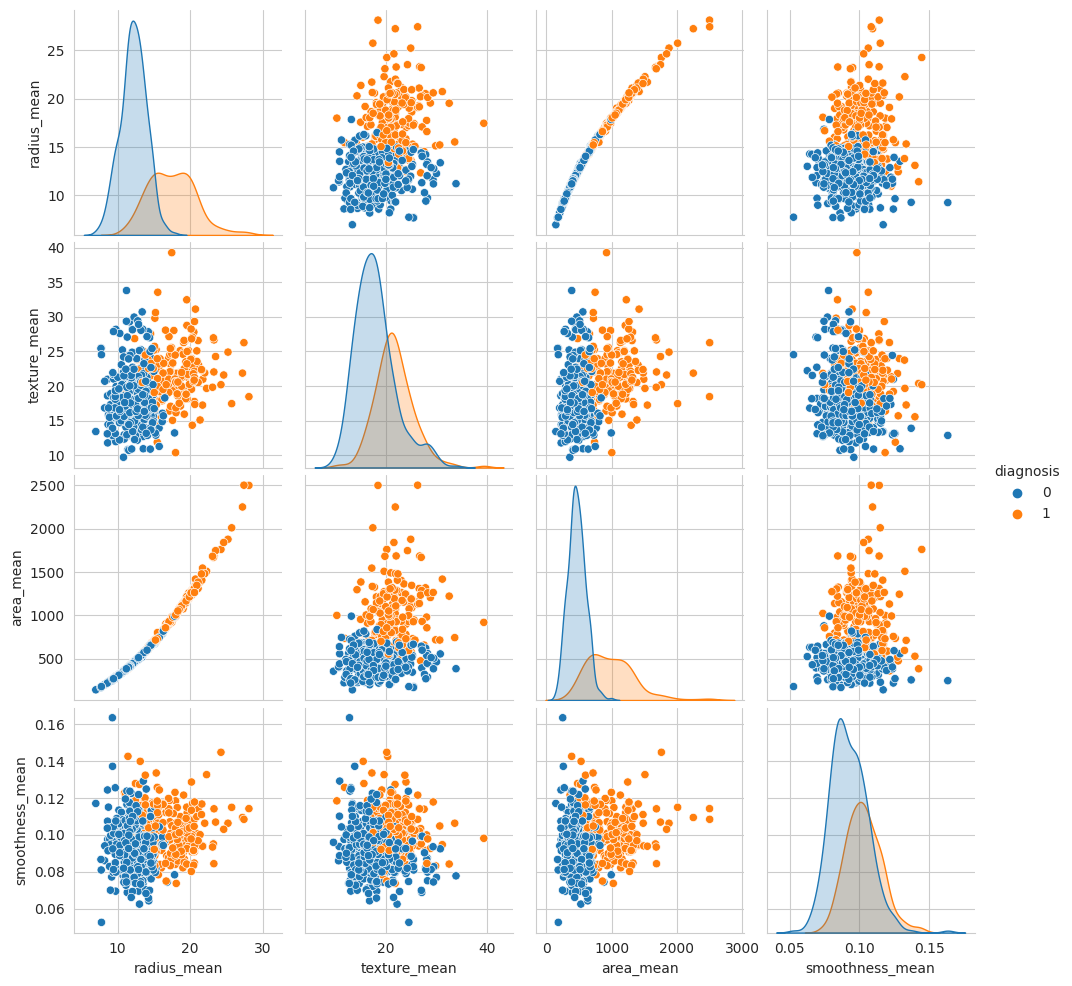

In [38]:
sns.pairplot(df,vars=['radius_mean','texture_mean','area_mean','smoothness_mean'],hue='diagnosis')
plt.show()

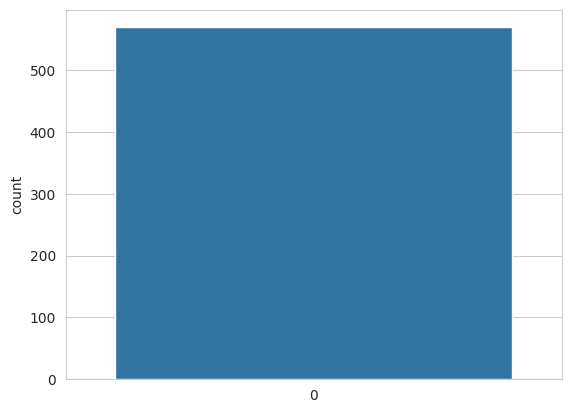

In [39]:
sns.countplot(df['diagnosis'])
plt.show()

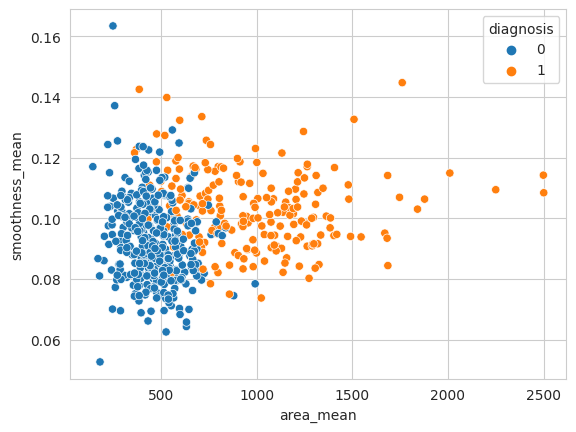

In [40]:
sns.scatterplot(x='area_mean',y='smoothness_mean',hue='diagnosis',data=df)
plt.show()

**2. Explain the intuition behind the Support Vector Machines (SVM) algorithm. (Hint: SVM finds an optimal hyperplane to separate classes with the largest margin.)**

  Answer:
  The Support Vector Machines (SVM) algorithm aims to find an optimal hyperplane that can effectively separate different classes in a dataset. The intuition behind SVM is to maximize the margin between the decision boundary (hyperplane) and the nearest data points of each class.

  In a binary classification problem, SVM tries to find a hyperplane that can best separate the two classes by maximizing the distance (margin) between the hyperplane and the nearest data points from each class. These data points, called support vectors, are the crucial points that define the decision boundary.

  The key idea is to find the hyperplane that not only separates the classes but also generalizes well to unseen data. By maximizing the margin, SVM aims to achieve better generalization performance, as the larger the margin, the more robust the decision boundary is to potential noise or variability in the data.

  In cases where the data points are not linearly separable, SVM can utilize a technique called the kernel trick. The kernel trick maps the input data into a higher-dimensional feature space, where the classes might become linearly separable. This allows SVM to handle complex decision boundaries and capture non-linear relationships between features.

  In summary, the intuition behind SVM is to find the hyperplane with the largest margin between classes, allowing for effective separation of data points and better generalization to unseen examples.

**3. Split the dataset into training and testing sets using a 75:25 ratio. Utilize the train_test_split function from scikit-learn. (Hint: Import train_test_split and provide the necessary arguments: dataset, test size, and random state.)**

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


**4.Train an SVM classifier on the training data. What is the chosen kernel for the SVM? Utilize the SVC class from scikit-learn. (Hint: Import SVC and create an instance. Use the fit method with the training data.)**

In [42]:
from sklearn.svm import SVC

# Assuming X_train and y_train are the training data
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

chosen_kernel = svm_classifier.kernel
print("Chosen kernel:", chosen_kernel)

Chosen kernel: linear


**5. Make predictions on the testing data using the trained SVM model. ( Hint: Use the predict method with the testing data.)**

In [43]:
y_predict=svm_classifier.predict(X_test)
y_test

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [44]:
y_predict

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

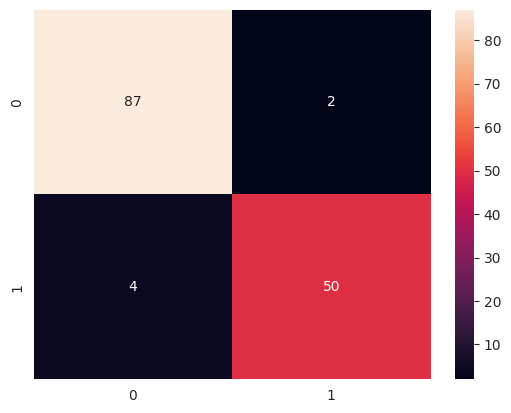

In [45]:
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)
plt.show()

In [46]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        89
           1       0.96      0.93      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



**6. Calculate the accuracy, precision, and recall of the SVM model using appropriate functions from scikit-learn. (Hint: Import the necessary metrics and apply the respective functions using predicted labels and ground truth labels.)**

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.958041958041958
Precision: 0.9615384615384616
Recall: 0.9259259259259259


***Training model using Scaled Data (optional)***

In [48]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.fit_transform(X_test)

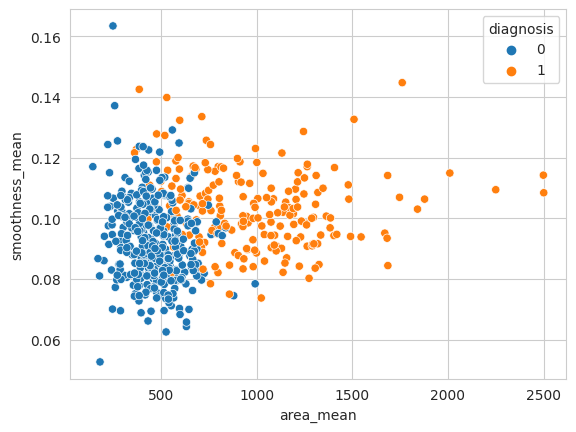

In [49]:
sns.scatterplot(x='area_mean',y='smoothness_mean',hue='diagnosis',data=df)
plt.show()

In [50]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train_scaled,y_train)

SVC()

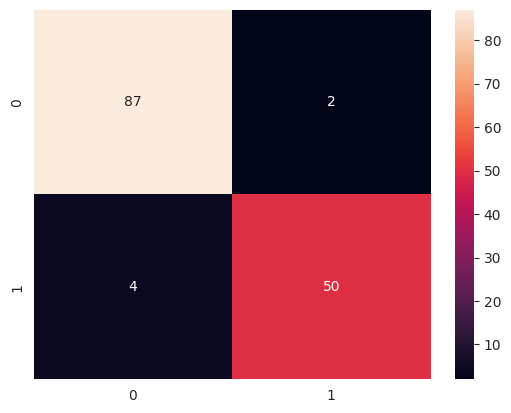

In [51]:
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)
plt.show()

In [52]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        89
           1       0.96      0.93      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



**7. How does SVM handle non-linearly separable data? Explain the concept of the kernel trick. (Hint: SVM can transform data into a higher-dimensional space using a kernel function.)**

  Answer: When faced with non-linearly separable data, Support Vector Machines (SVM) handle it by using a technique called the kernel trick. The kernel trick allows SVM to transform the original data into a higher-dimensional feature space, where the classes might become linearly separable.

  The concept of the kernel trick revolves around the use of a kernel function. A kernel function calculates the similarity between two data points in the original feature space or implicitly in the higher-dimensional feature space without explicitly computing the coordinates of the data points in that space.

  By applying a kernel function, SVM effectively maps the original data into a higher-dimensional feature space, where the classes may become linearly separable. This transformation allows SVM to capture more complex relationships and create non-linear decision boundaries.

  The kernel trick saves computational resources as it avoids explicitly calculating the coordinates of the data points in the higher-dimensional feature space. Instead, it directly computes the dot products or similarities between data points in the original space, effectively leveraging the properties of the kernel function.

  Some common kernel functions used in SVM include:

  1. Linear Kernel: It represents a linear transformation and is suitable for linearly separable data.

  2. Polynomial Kernel: It applies a polynomial transformation to the data, allowing for curved decision boundaries.

  3. Radial Basis Function (RBF) Kernel: It applies a radial basis transformation, making it suitable for capturing complex non-linear relationships.

  4. Sigmoid Kernel: It applies a sigmoid transformation, which can be useful for certain types of non-linear data.

  In summary, the kernel trick is a powerful concept in SVM that allows the algorithm to handle non-linearly separable data. By mapping the data into a higher-dimensional feature space, SVM can find optimal decision boundaries and effectively classify complex datasets.

**8. Use the `GridSearchCV` class from scikit-learn to perform hyperparameter tuning for the SVM model. Tune the C parameter and the choice of kernel. What are the best values found for these hyperparameters? (Hint: Import GridSearchCV and specify the parameter grid. Access the best parameters using the best_params_ attribute.)**

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Assuming X_train and y_train are the training data
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'C': 10, 'kernel': 'linear'}


**9. Visualize the decision boundary of the SVM model on a scatter plot of the test data points using Matplotlib. (Hint: Create a mesh grid of points, use the `predict` method on the mesh grid, and plot the mesh grid and scatter plot.)**

In [54]:
# import numpy as np
# import matplotlib.pyplot as plt

# svm_classifier = SVC()
# svm_classifier.fit(X_train, y_train)

# x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
# y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired)
# plt.contourf(xx, yy, alpha=0.8, cmap=plt.cm.Paired)

# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('SVM Decision Boundary')

# plt.show()